#Telecom X – Parte 2: Predicción de Cancelación (Churn)

##🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

##🧠 Objetivos del Desafío

* Preparar los datos para el modelado (tratamiento, codificación, normalización).
* Realizar análisis de correlación y selección de variables.
* Entrenar dos o más modelos de clasificación.
* Evaluar el rendimiento de los modelos con métricas.
* Interpretar los resultados, incluyendo la importancia de las variables.
* Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

##🛠️ Preparación de los Datos

###✔️ Importacion de Librerias

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

###✔️ Extracción del Archivo Tratado

In [128]:
datos = pd.read_csv('datos_tratados.csv')
datos.head()

,ID_Cliente,Evasión,Género,Ciudadano_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefónico,MúltiplesLíneas_Telefónicas,Servicio_Internet,...,SeguridadAdicional_Internet,SoporteTécnico_Internet,Transmisión_TV,Transmisión_Películas,Tipo_Contrato,Factura_Online,Forma_Pago,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [129]:
# Ver las columnas disponibles
datos.columns

Index(['ID_Cliente', 'Evasión', 'Género', 'Ciudadano_Mayor', 'Pareja',
       'Dependientes', 'Meses_Contrato', 'Servicio_Telefónico',
       'MúltiplesLíneas_Telefónicas', 'Servicio_Internet',
       'SeguridadEnLínea_Internet', 'CopiaDeSeguridadEnLínea_Internet',
       'SeguridadAdicional_Internet', 'SoporteTécnico_Internet',
       'Transmisión_TV', 'Transmisión_Películas', 'Tipo_Contrato',
       'Factura_Online', 'Forma_Pago', 'Cuentas_Mensuales', 'Cuentas_Totales',
       'Cuentas_Diarias'],
      dtype='object')

In [130]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID_Cliente                        7032 non-null   object 
 1   Evasión                           7032 non-null   object 
 2   Género                            7032 non-null   object 
 3   Ciudadano_Mayor                   7032 non-null   int64  
 4   Pareja                            7032 non-null   object 
 5   Dependientes                      7032 non-null   object 
 6   Meses_Contrato                    7032 non-null   int64  
 7   Servicio_Telefónico               7032 non-null   object 
 8   MúltiplesLíneas_Telefónicas       7032 non-null   object 
 9   Servicio_Internet                 7032 non-null   object 
 10  SeguridadEnLínea_Internet         7032 non-null   object 
 11  CopiaDeSeguridadEnLínea_Internet  7032 non-null   object 
 12  Seguri

###✔️ Eliminación de Columnas Irrelevantes

En la etapa de eliminación de columnas irrelevantes, el objetivo es excluir variables que:

* No tienen valor predictivo (ej.: identificadores únicos).
* Son redundantes con otras.
* Pueden causar fuga de datos (data leakage).

In [131]:
datos = datos.drop(['ID_Cliente'], axis=1)

In [132]:
datos.sample(5)

,Evasión,Género,Ciudadano_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefónico,MúltiplesLíneas_Telefónicas,Servicio_Internet,SeguridadEnLínea_Internet,...,SeguridadAdicional_Internet,SoporteTécnico_Internet,Transmisión_TV,Transmisión_Películas,Tipo_Contrato,Factura_Online,Forma_Pago,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
4247,No,Female,0,Yes,Yes,67,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),69.90,4615.90,2.330000
5898,No,Male,0,No,No,14,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.05,299.30,0.668333
6000,No,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.55,1411.65,2.685000
994,Yes,Male,0,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.15,69.15,2.305000
974,No,Male,1,Yes,No,54,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,110.45,6077.75,3.681667


###✔️ Encoding

####📌 Agrupación de No y No service

✅ **Por qué agrupamos `"No"` y `"No internet service"` / `"No"` y `"No phone service"`**

🎯 **Objetivo**

Reducir **multicolinealidad** y **simplificar los datos** sin perder relevancia para el modelo predictivo.

---

⚠️ **El problema original**

* Variables como `MúltiplesLíneas_Telefónicas`, tenían **tres categorías**:

  * `"Yes"` → cliente usa el servicio telefonico
  * `"No"` → cliente tiene servicio telefonico, pero no suscripción a más de una línea de teléfono
  * `"No phone service"` → cliente **ni siquiera tiene servicio telefonico**, por lo tanto no puede usar el servicio

* Variables como `SeguridadEnLínea_Internet`, `CopiaDeSeguridadEnLínea_Internet`,`SeguridadAdicional_Internet`, `SoporteTécnico_Internet`,`Transmisión_TV`,`Transmisión_Películas`, tenían **tres categorías**:

  * `"Yes"` → cliente usa el servicio
  * `"No"` → cliente tiene internet, pero no contrató el servicio
  * `"No internet service"` → cliente **ni siquiera tiene internet**, por lo tanto no puede usar el servicio

* Esto generaba **multicolinealidad perfecta** al transformar estas categorías en *dummies*, lo que:

  * Creaba **correlación 1.0** entre variables
  * Generaba **VIF infinito**
  * Comprometía la estabilidad y el rendimiento de los modelos

---

✅ **La solución: agrupar `"No internet service"` como `"No"` y  agrupar `"No phone service"` como `"No"`**

* **Agrupamos** `"No internet service"` como `"No"` para simplificar la variable:

  * Ahora: `"Yes"` = usa el servicio
    `"No"` = no usa el servicio (por cualquier motivo)

* **Agrupamos** `"No phone service"` como `"No"` para simplificar la variable:

  * Ahora: `"Yes"` = usa el servicio
    `"No"` = no usa el servicio (por cualquier motivo)

* Esto **reduce la dimensionalidad** y **evita multicolinealidad**.

* La información de que el cliente **no tiene internet** sigue estando en la variable `Servicio_Internet`.
* La información de que el cliente **no tiene servicio telefonico** sigue estando en la variable `Servicio_Telefónico`.

---

🧠 **¿Y el impacto?**

* Perdemos un matiz (por qué el cliente no usa el servicio), **pero**:

  * Esto rara vez afecta el rendimiento del modelo
  * Ganamos **más robustez, menos ruido y menos redundancia**

In [133]:
# Crear una nueva DataFrame
datos_clean = datos.copy()

# === Etapa 1: Agrupar de No y No service:
#Cambiar "No phone service" como "No"
datos_clean['MúltiplesLíneas_Telefónicas'] = datos_clean['MúltiplesLíneas_Telefónicas'].replace('No phone service', 'No')

#Agrupar "No internet service" como "No"
columnas_internet = [
    'SeguridadEnLínea_Internet', 'CopiaDeSeguridadEnLínea_Internet','SeguridadAdicional_Internet',
    'SoporteTécnico_Internet','Transmisión_TV','Transmisión_Películas'
]

for col in columnas_internet:
    datos_clean[col] = datos_clean[col].replace('No internet service', 'No')

datos_clean.sample(5)

,Evasión,Género,Ciudadano_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefónico,MúltiplesLíneas_Telefónicas,Servicio_Internet,SeguridadEnLínea_Internet,...,SeguridadAdicional_Internet,SoporteTécnico_Internet,Transmisión_TV,Transmisión_Películas,Tipo_Contrato,Factura_Online,Forma_Pago,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
4695,No,Female,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,50.95,123.05,1.698333
1014,No,Female,0,Yes,Yes,3,Yes,No,No,No,...,No,No,No,No,Month-to-month,No,Mailed check,19.65,60.65,0.655000
5598,No,Male,0,No,No,14,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.45,1117.55,2.548333
2048,Yes,Male,0,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.40,518.90,1.513333
2921,No,Female,0,No,No,21,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.90,3.001667


In [134]:
datos_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Evasión                           7032 non-null   object 
 1   Género                            7032 non-null   object 
 2   Ciudadano_Mayor                   7032 non-null   int64  
 3   Pareja                            7032 non-null   object 
 4   Dependientes                      7032 non-null   object 
 5   Meses_Contrato                    7032 non-null   int64  
 6   Servicio_Telefónico               7032 non-null   object 
 7   MúltiplesLíneas_Telefónicas       7032 non-null   object 
 8   Servicio_Internet                 7032 non-null   object 
 9   SeguridadEnLínea_Internet         7032 non-null   object 
 10  CopiaDeSeguridadEnLínea_Internet  7032 non-null   object 
 11  SeguridadAdicional_Internet       7032 non-null   object 
 12  Soport

📌 Transformacion de las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning.

In [135]:
# === Etapa 2: One-hot encoding
# Obtener las columnas con tipo de dato 'object' (generalmente categóricas)
col_categoricas = datos_clean.select_dtypes(include='object').columns.tolist()

# Aplicar One-hot encoding a las columnas categóricas
datos_encoded = pd.get_dummies(datos_clean, columns=col_categoricas, drop_first=True)

datos_encoded.sample(5)

,Ciudadano_Mayor,Meses_Contrato,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias,Evasión_Yes,Género_Male,Pareja_Yes,Dependientes_Yes,Servicio_Telefónico_Yes,...,SeguridadAdicional_Internet_Yes,SoporteTécnico_Internet_Yes,Transmisión_TV_Yes,Transmisión_Películas_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Factura_Online_Yes,Forma_Pago_Credit card (automatic),Forma_Pago_Electronic check,Forma_Pago_Mailed check
2003,0,25,34.00,853.00,1.133333,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
1318,0,1,45.30,45.30,1.510000,True,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3339,0,30,19.05,637.55,0.635000,False,True,True,False,True,...,False,False,False,False,False,True,False,False,False,True
4306,0,16,88.45,1422.10,2.948333,True,False,False,False,True,...,True,False,False,True,False,False,True,False,True,False
1906,0,21,36.00,780.15,1.200000,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [136]:
datos_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Ciudadano_Mayor                       7032 non-null   int64  
 1   Meses_Contrato                        7032 non-null   int64  
 2   Cuentas_Mensuales                     7032 non-null   float64
 3   Cuentas_Totales                       7032 non-null   float64
 4   Cuentas_Diarias                       7032 non-null   float64
 5   Evasión_Yes                           7032 non-null   bool   
 6   Género_Male                           7032 non-null   bool   
 7   Pareja_Yes                            7032 non-null   bool   
 8   Dependientes_Yes                      7032 non-null   bool   
 9   Servicio_Telefónico_Yes               7032 non-null   bool   
 10  MúltiplesLíneas_Telefónicas_Yes       7032 non-null   bool   
 11  Servicio_Internet

####📌Verificación nuevamente de los valores nulos

In [137]:
datos_encoded.isnull().sum()

,0
Ciudadano_Mayor,0
Meses_Contrato,0
Cuentas_Mensuales,0
Cuentas_Totales,0
Cuentas_Diarias,0
Evasión_Yes,0
Género_Male,0
Pareja_Yes,0
Dependientes_Yes,0
Servicio_Telefónico_Yes,0


In [138]:
# Verifica valores nulos en las dos columnas
print(datos_encoded[['Cuentas_Diarias', 'Cuentas_Totales']].isnull().sum())

Cuentas_Diarias    0
Cuentas_Totales    0
dtype: int64


###✔️ Verificación de la Proporción de Cancelación (Evasion)

* Calcular la proporción de clientes que cancelaron en relación con los que permanecieron activos.
* Evaluar si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [139]:
# Calcular el número de clientes que cancelaron y los que no
clientes_cancelaron = datos_encoded['Evasión_Yes'].value_counts()

# Calcular la proporción
proporcion_evasion = clientes_cancelaron/ len(datos_encoded)

print("Conteo de Evasión:")
print(clientes_cancelaron)
print("\nProporción de Evasión:")
print(proporcion_evasion)

Conteo de Evasión:
Evasión_Yes
False    5163
True     1869
Name: count, dtype: int64

Proporción de Evasión:
Evasión_Yes
False    0.734215
True     0.265785
Name: count, dtype: float64


📍 Al analizar los datos, vemos que la mayoría de los clientes se quedaron en la empresa (**aprox. 73,4 %**), mientras que una parte menor decidió cancelarla (**aprox. 26,6 %**). Esta diferencia crea un desequilibrio entre las clases, lo que significa que, si no lo tratamos, el modelo podría aprender a predecir con más facilidad que los clientes permanecen, ignorando en parte a quienes cancelan. Por eso, es importante corregir este desequilibrio antes de entrenar el modelo.

###✔️ Balanceo de Clases

Si se quiere profundizar en el análisis, se pueden aplicar técnicas de balanceo de clases, como reducir la cantidad de ejemplos de la clase mayoritaria (undersampling) o aumentar la de la clase minoritaria (oversampling). En casos donde el desbalance es muy marcado, se pueden usar métodos como SMOTE, que generan ejemplos sintéticos de la clase con menos datos, ayudando a que el modelo aprenda de manera más equilibrada.

####📌 Variables explicativas y variable de respuesta

In [140]:
X = datos_encoded.drop('Evasión_Yes', axis=1) #variable explicativa
y = datos_encoded['Evasión_Yes'] #variable respuesta

####📌 Oversampling

In [141]:
from imblearn.over_sampling import SMOTE

oversamplig = SMOTE()
x_balanceado, y_balanceado = oversamplig.fit_resample(X, y)


print("Forma de X antes de SMOTE:", X.shape)
print("Forma de y antes de SMOTE:", y.shape)
print("Forma de X después de SMOTE:", x_balanceado.shape)
print("Forma de y después de SMOTE:", y_balanceado.shape)
print("\nDistribución de clases después de SMOTE:")
print(y_balanceado.value_counts())

Forma de X antes de SMOTE: (7032, 24)
Forma de y antes de SMOTE: (7032,)
Forma de X después de SMOTE: (10326, 24)
Forma de y después de SMOTE: (10326,)

Distribución de clases después de SMOTE:
Evasión_Yes
False    5163
True     5163
Name: count, dtype: int64


###✔️ Normalización o Estandarización

🔄 Normalización de los datos

La normalización es un paso fundamental en el preprocesamiento, sobre todo para algoritmos que son sensibles a la escala de las variables. Algunos ejemplos de estos modelos son:

* KNN (K-Nearest Neighbors)
* Redes Neuronales
* Regresión Logística
* SVM (Support Vector Machine)

En cambio, los modelos basados en árboles (como Decision Tree, Random Forest o XGBoost) no necesitan normalización, ya que funcionan creando reglas de decisión independientes de la escala de los datos.

En este proyecto utilizaremos la normalización Min-Max, que convierte los valores al rango [0, 1]. De esta manera, todas las variables numéricas tendrán el mismo peso y podrán aportar de forma equilibrada al modelo.

In [142]:
from sklearn.preprocessing import MinMaxScaler

# Identificar columnas numéricas
col_numericas = x_balanceado.select_dtypes(include=np.number).columns

# Inicializar el escalador
escalador = MinMaxScaler()

# Aplicar el escalador a las columnas numéricas de los datos balanceados
x_balanceado[col_numericas] = escalador.fit_transform(x_balanceado[col_numericas])

# Mostrar las primeras filas de los datos escalados
x_balanceado.head()

,Ciudadano_Mayor,Meses_Contrato,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias,Género_Male,Pareja_Yes,Dependientes_Yes,Servicio_Telefónico_Yes,MúltiplesLíneas_Telefónicas_Yes,...,SeguridadAdicional_Internet_Yes,SoporteTécnico_Internet_Yes,Transmisión_TV_Yes,Transmisión_Películas_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Factura_Online_Yes,Forma_Pago_Credit card (automatic),Forma_Pago_Electronic check,Forma_Pago_Mailed check
0,0.0,0.112676,0.471144,0.066294,0.471144,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0.112676,0.414428,0.060420,0.414428,True,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,0.042254,0.553731,0.030239,0.553731,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,1.0,0.169014,0.793532,0.140670,0.793532,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1.0,0.028169,0.653234,0.028687,0.653234,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


## ≡ Correlación y Selección de Variables

###✔️ Análisis de Correlación

In [143]:
# Combinar características y variable objetivo para el análisis de correlación
df_balanceado = pd.concat([x_balanceado, y_balanceado], axis=1)

# Calcular la matriz de correlación
matriz_correlacion = df_balanceado.corr()

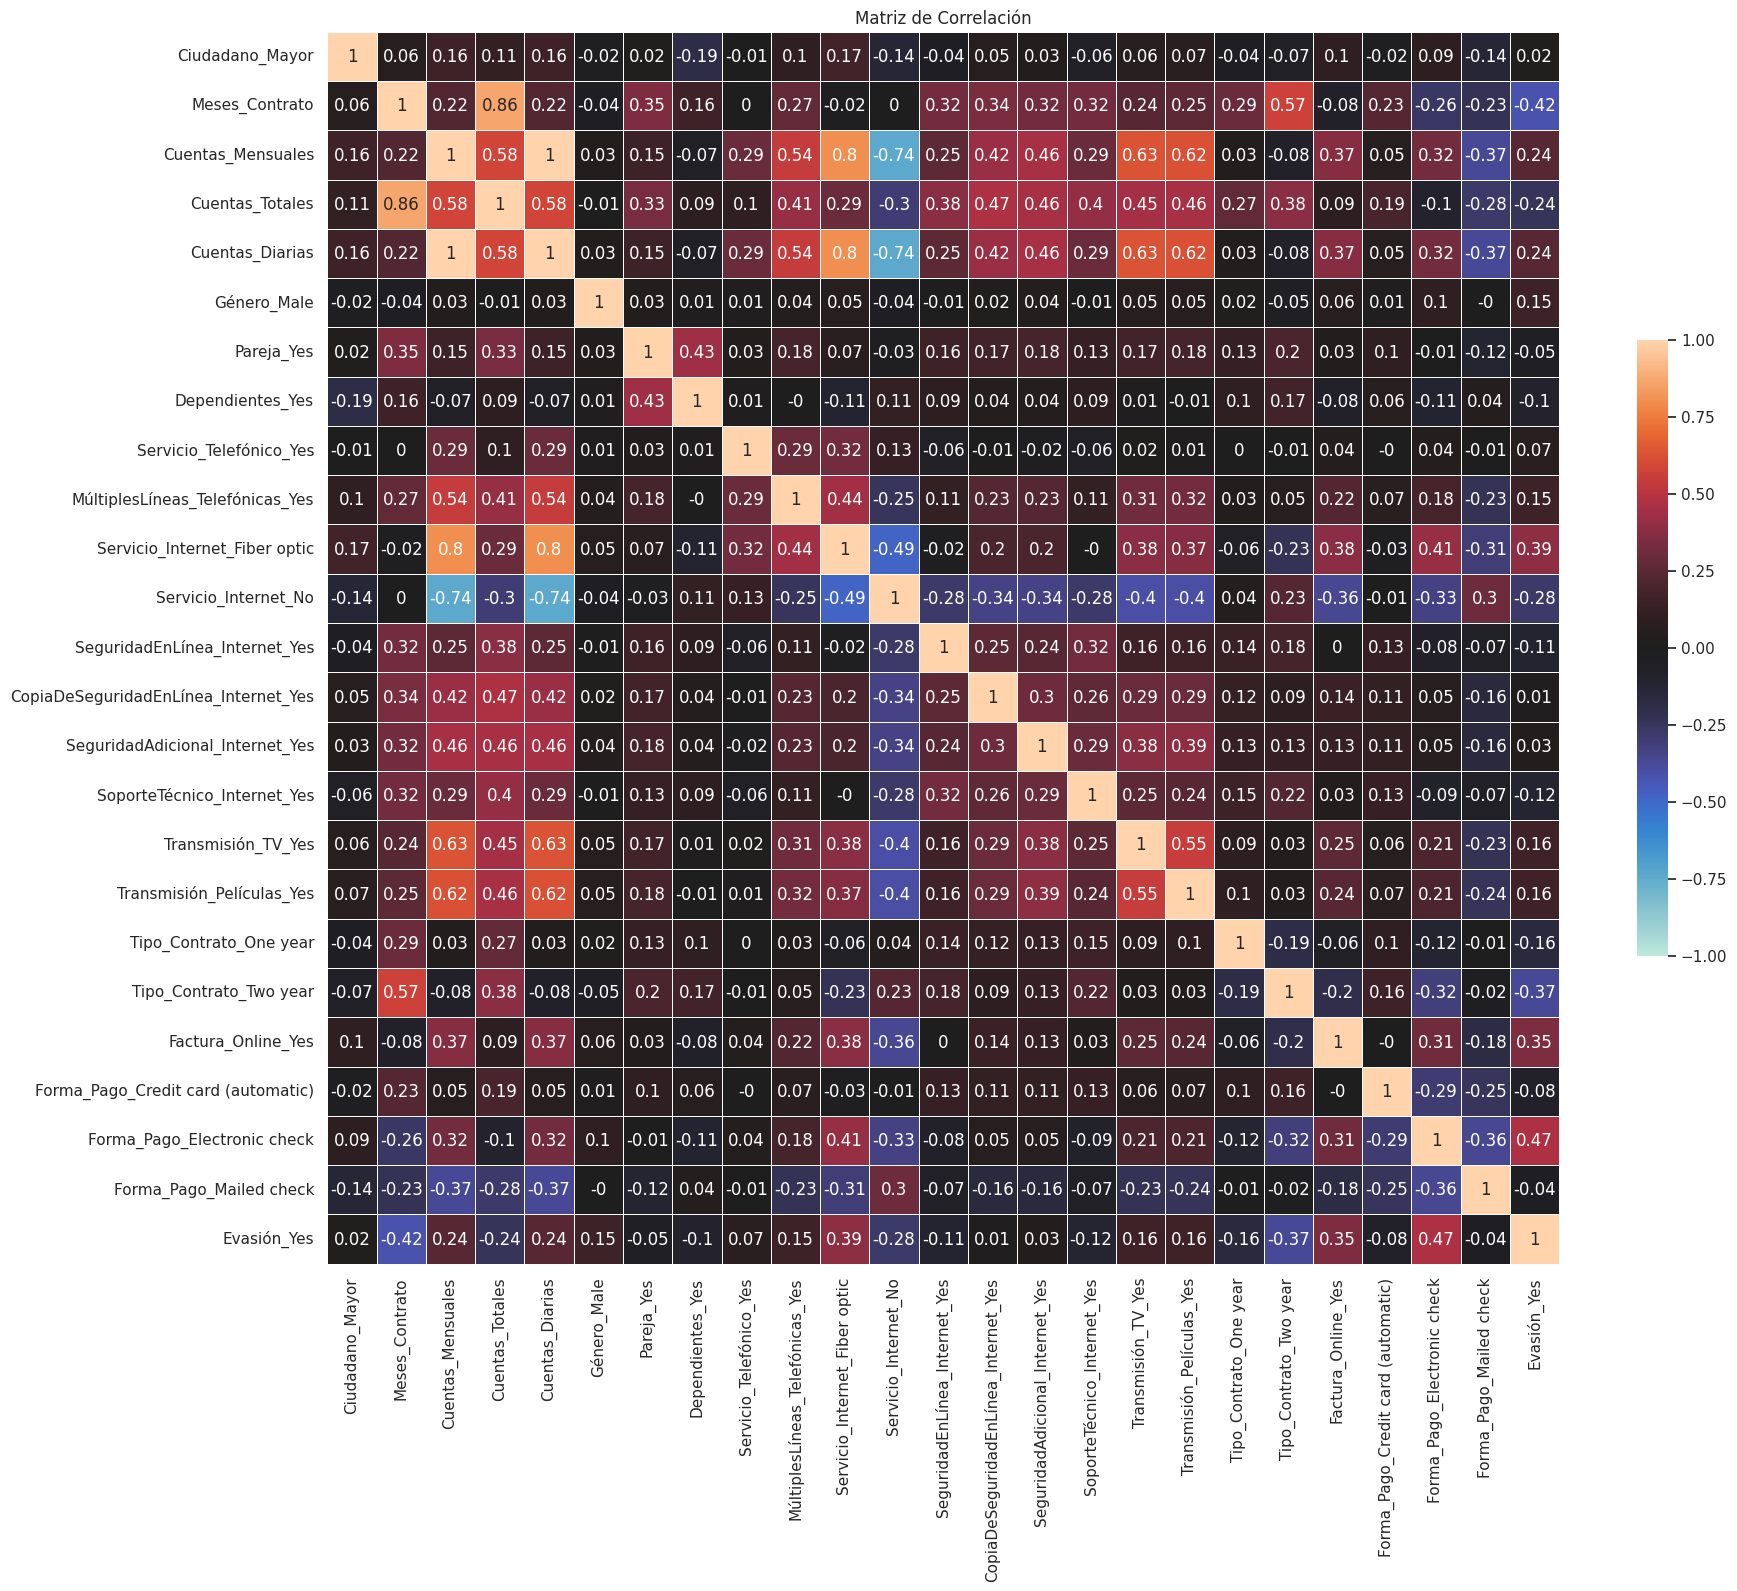

In [144]:
# Graficar el heatmap
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(matriz_correlacion, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.title('Matriz de Correlación')
plt.show()

***Debido a que existe una cantidad considerable de variables, para una mejor visualización selecionaré aquellas que tiene una correlación absoluta con la Evasión mayor a 0.2***

**📍 ¿Por qué esta aproximación es adecuada para nuestro problema?**
* Nuestro foco es entender qué variables tienen mayor correlación con la variable objetivo "Evasión".
* Filtrando por las variables más relevantes, obtenemos un subconjunto manejable.
* Mostrando solo el triángulo inferior de la matriz filtrada, podemos visualizar claramente esas correlaciones y las interrelaciones entre estas variables, sin contaminación visual.
* Esta técnica facilita la comunicación de resultados y el direccionamiento de análisis futuros.

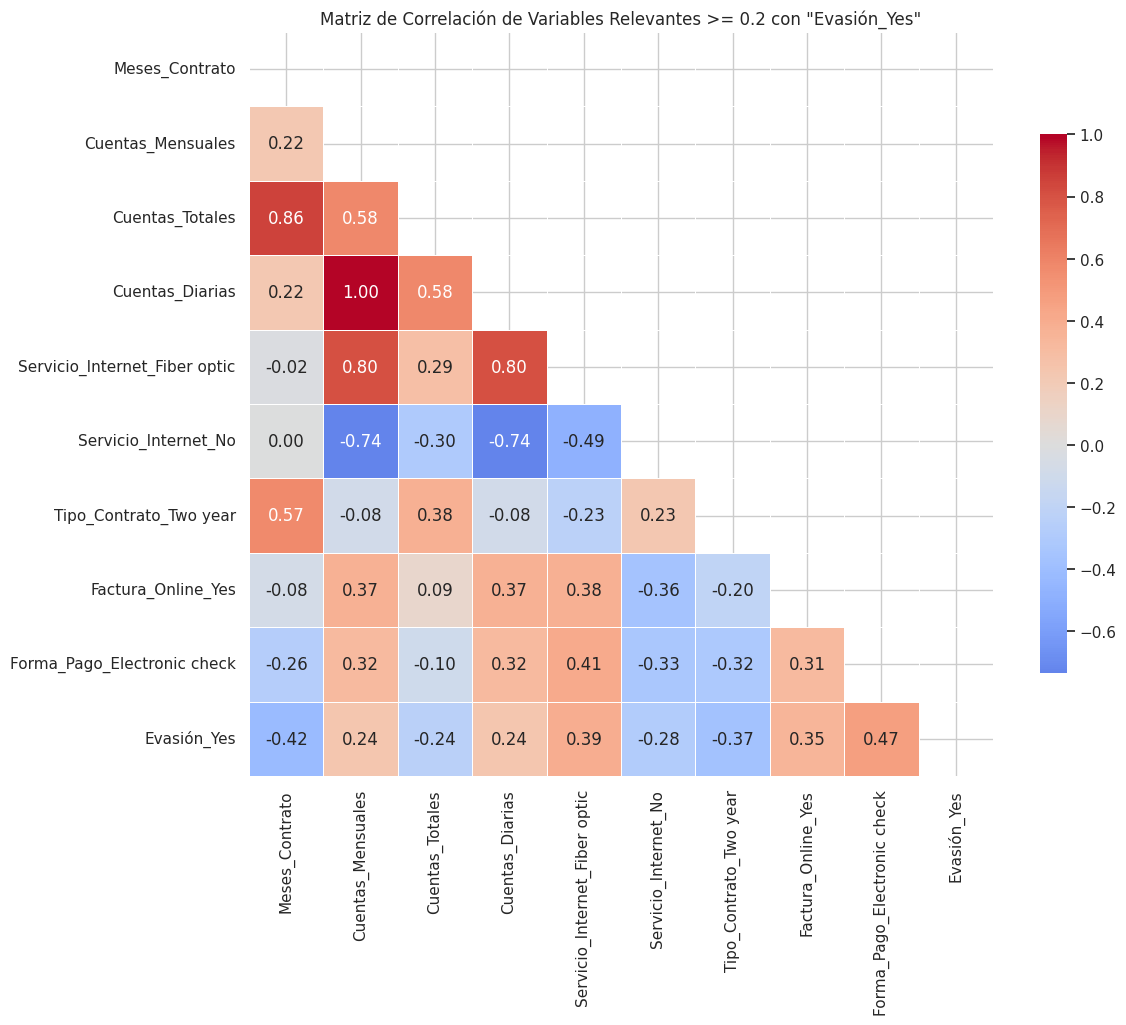

In [145]:
# Definir la variable objetivo
target_variable = 'Evasión_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
umbral_correlacion= 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = matriz_correlacion.index[abs(matriz_correlacion[target_variable]) >= umbral_correlacion].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_variable not in variables_relevantes:
    variables_relevantes.append(target_variable)

# Crear una matriz de correlación solo con las variables seleccionadas
matriz_correlacion_relevantes = matriz_correlacion.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(matriz_correlacion_relevantes, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    matriz_correlacion_relevantes,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Matriz de Correlación de Variables Relevantes >= {umbral_correlacion} con "{target_variable}"')
plt.show()

---

✅ **Análisis del nuevo heatmap de correlación**

> Recordando que el gráfico muestra **correlaciones ≥ 0.2** (o ≤ -0.2) con la variable objetivo `Evasión_Yes`.

---

🔍 **Correlación con `Evasión_Yes` (variable objetivo)**

| Variable                                 | Correlación con Evasión\_Yes | Interpretación                                                                                                               |
| ---------------------------------------- | -------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| `Servicio_Internet_Fiber optic`   | **+0.39**                  | Clientes con fibra óptica tienen **mayor probabilidad de Evasión**. Puede estar relacionado al costo o a la competitividad.    |
| `Forma_Pago_Electronic check` | **+0.47**                  | Pagos por cheque electrónico están asociados a más Evasión — quizás por perfil de cliente menos fidelizado.                    |
| `Tipo_Contrato_Two year`              | **-0.36**                  | Contratos de 2 años reducen el Evasión (clientes más comprometidos o con beneficios)                                           |
| `Meses_Contrato`                        | **-0.45**                  | Cuanto mayor el tiempo como cliente, menor la probabilidad de Evasión — esperado                                               |
| `Servicio_Internet_No `            | **-0.28**                  | Quienes **no usan internet** tienden a evadir menos — posiblemente perfiles más estables (adultos mayores, menos digitales) |


###✔️ Análisis Dirigido

In [146]:
# Asignar valores booleanos a las cadenas 'Si' y 'No'
df_balanceado_grafica = df_balanceado.copy()
df_balanceado_grafica['Evasión_Yes'] = df_balanceado_grafica['Evasión_Yes'].map({True: 'Si', False: 'No'})
df_balanceado_grafica = df_balanceado_grafica.rename(columns={'Evasión_Yes': 'Evasión'})

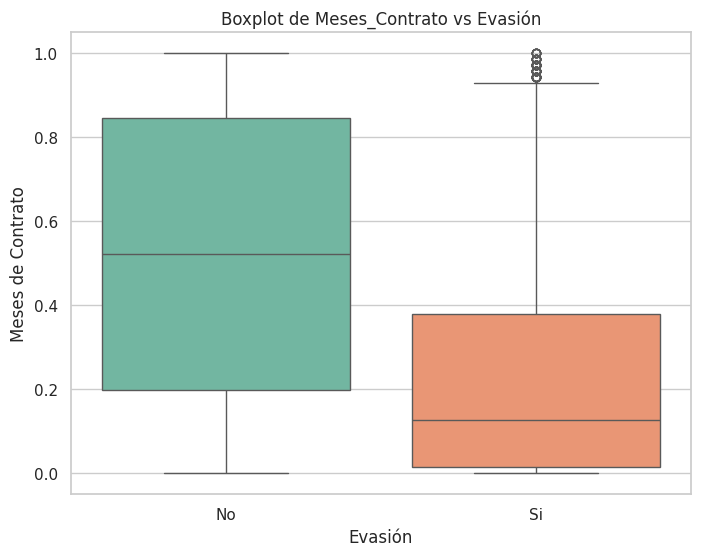

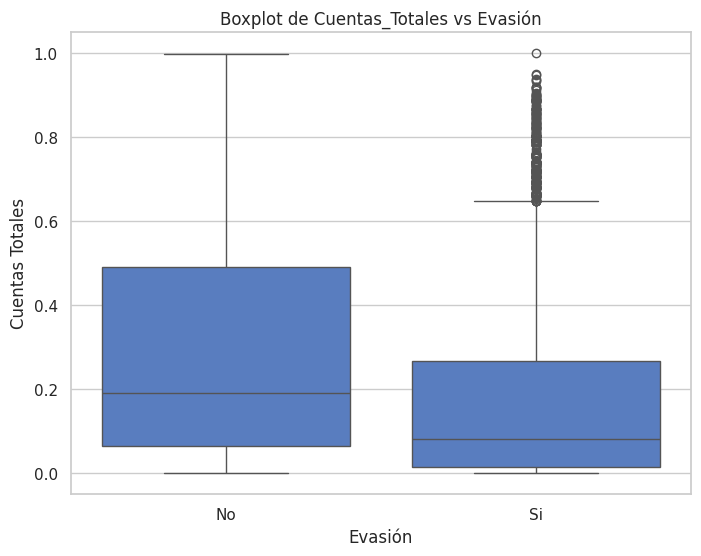

In [147]:
sns.set(style="whitegrid", palette="muted")
# Boxplot for 'Meses_Contrato' vs 'Evasión'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasión', y='Meses_Contrato', data=df_balanceado_grafica, palette="Set2",hue='Evasión', legend=False)
plt.title('Boxplot de Meses_Contrato vs Evasión')
plt.xlabel('Evasión')
plt.ylabel('Meses de Contrato')
plt.show()

# Boxplot for 'Cuentas_Totales' vs 'Evasión_Yes'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasión', y='Cuentas_Totales', data=df_balanceado_grafica)
plt.title('Boxplot de Cuentas_Totales vs Evasión')
plt.xlabel('Evasión')
plt.ylabel('Cuentas Totales')
plt.show()

In [148]:
# ---------------------------
# BOXPLOTS
# ---------------------------

# Meses de Contrato × Evasión
fig_box_meses = px.box(
    df_balanceado_grafica,
    x="Evasión",
    y="Meses_Contrato",
    points="all",  # muestra puntos además de la caja
    color="Evasión",
    width=1000,
    title="Boxplot de Meses de Contrato vs Evasión"
)
fig_box_meses.show()

# Cuentas Totales × Evasión
fig_box_cuentas = px.box(
    df_balanceado_grafica,
    x="Evasión",
    y="Cuentas_Totales",
    points="all",
    color="Evasión",
    width=1000,
    title="Boxplot de Cuentas Totales vs Evasión"
)
fig_box_cuentas.show()


**📍 Observando el Boxplot de Meses de Contrato vs. Evasión:**
* El boxplot para los clientes que No cancelaron (No) muestra que la mediana de los meses de contrato es significativamente más alta que la mediana para los clientes que Sí cancelaron (Si).
* La caja (que representa el rango intercuartílico) para los clientes que No cancelaron es más amplia y se extiende hacia valores más altos de meses de contrato, indicando una mayor variabilidad y una tendencia a contratos más largos.
* La caja para los clientes que Sí cancelaron es más estrecha y se concentra en los valores más bajos de meses de contrato. Esto confirma que los clientes que cancelan tienden a tener contratos de menor duración.

**📍 Observando el Boxplot de Cuentas Totales vs. Evasión:**
* Similar al boxplot de meses de contrato, la mediana de las 'Cuentas_Totales' para los clientes que No cancelaron es notablemente más alta que la mediana para los clientes que Sí cancelaron.
* La distribución de 'Cuentas_Totales' para los clientes que No cancelaron se extiende a valores mucho más altos, con algunos valores atípicos (outliers) en el extremo superior.
* La distribución de 'Cuentas_Totales' para los clientes que Sí cancelaron está más concentrada en valores más bajos.

In [149]:
# ---------------------------
# SCATTER PLOTS
# ---------------------------

# Meses de Contrato × Evasión
fig_scatter_meses = px.strip(
    df_balanceado_grafica,
    x="Evasión",
    y="Meses_Contrato",
    color="Evasión",
    width=1000,
    title="Scatter de Meses de Contrato vs Evasión",
    stripmode="overlay"
)
fig_scatter_meses.show()

# Cuentas Totales × Evasión
fig_scatter_cuentas = px.strip(
    df_balanceado_grafica,
    x="Evasión",
    y="Cuentas_Totales",
    color="Evasión",
    width=1000,
    title="Scatter de Cuentas Totales vs Evasión",
    stripmode="overlay"
)
fig_scatter_cuentas.show()

**📍Observando el gráfico de dispersión para Meses de Contrato vs. Evasión:**
* Puedes ver que los puntos de datos para los clientes que No cancelaron (No) están distribuidos a lo largo de todo el rango de 'Meses_Contrato', con una mayor densidad hacia duraciones de contrato más largas.
* Por el contrario, los puntos de datos para los clientes que Sí cancelaron (Si) están muy concentrados en el extremo inferior de 'Meses_Contrato', lo que indica que la mayoría de los clientes que cancelaron tenían duraciones de contrato relativamente cortas. Esto refuerza la observación del boxplot de que los plazos de contrato más cortos están asociados con una mayor probabilidad de cancelación.

**📍Observando el gráfico de dispersión para Cuentas Totales vs. Evasión:**
* Para los clientes que No cancelaron (No), los puntos de datos para 'Cuentas_Totales' están distribuidos en un amplio rango, incluyendo muchos valores altos.
* Para los clientes que Sí cancelaron (Si), los puntos de datos para 'Cuentas_Totales' están en su mayoría agrupados en el extremo inferior de la escala. Esto concuerda con el boxplot y sugiere que los clientes con cuentas totales acumulados más bajos son más propensos a cancelar.

##🔍 Análisis de Multicolinealidad

**Usar análisis del Factor de Inflación de la Varianza (VIF):**

* El VIF ayuda a detectar la presencia de multicolinealidad entre variables independientes.
* Generalmente, **VIF > 5** o **VIF > 10** indica que la variable está colineal con otras y puede ser eliminada.

✅ **¿Cuándo es válido calcular el VIF?**

Puedes (y debes) calcular el VIF si:

1. **Vas a usar modelos lineales** (ej.: regresión logística, regresión lineal)
2. **Quieres interpretar los coeficientes** con claridad (la multicolinealidad distorsiona signos y magnitudes)
3. **Quieres garantizar estabilidad en el modelo**

---

❌ ¿Cuándo puedes saltarte el VIF (o postergarlo)?

* Si vas a usar **modelos no lineales**, como:

  * Árboles de decisión
  * Random Forest
  * XGBoost
  * Redes neuronales

* Estos modelos **no son sensibles a la multicolinealidad**.

---

✅ Conclusión final

| Pregunta                                           | Respuesta                                             |
| -------------------------------------------------- | ----------------------------------------------------- |
| ¿El nuevo heatmap muestra multicolinealidad grave? | **No**                                                |
| ¿Necesito calcular el VIF obligatoriamente?        | **No, pero es recomendable si usas modelos lineales** |
| ¿Vale la pena como verificación extra?             | **Sí, especialmente si el modelo es interpretativo**  |

---

###VIF 1

In [198]:
#Importando librerias
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [204]:
# Crear una copia del dataframe balanceado para el cálculo del VIF
df_vif = df_balanceado.copy()

# Seleccionar las variables independientes
X_vif = df_vif.drop(columns=['Evasión_Yes'], axis=1)

# Añadir una constante para el cálculo del VIF
X_const = add_constant(X_vif)

# Convertir columnas booleanas a float
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["Variables"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar el resultado
display(vif_data.sort_values(by='VIF', ascending=False))

,Variables,VIF
3,Cuentas_Mensuales,inf
5,Cuentas_Diarias,inf
0,const,34.763872
4,Cuentas_Totales,10.708192
2,Meses_Contrato,8.686529
11,Servicio_Internet_Fiber optic,7.772770
12,Servicio_Internet_No,6.411564
9,Servicio_Telefónico_Yes,2.469693
18,Transmisión_Películas_Yes,2.410619
17,Transmisión_TV_Yes,2.395795


✅ **Resumen general del análisis VIF**

| Rango de VIF       | Interpretación                |
| ------------------ | ----------------------------- |
| VIF ≈ 1            | Sin multicolinealidad         |
| 1 < VIF < 5        | Baja (aceptable)              |
| 5 ≤ VIF < 10       | Moderada (vigilar)            |
| VIF ≥ 10           | Alta (¡atención!)             |
| VIF = ∞ (infinito) | Multicolinealidad perfecta ⚠️ |


In [203]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para no modificar el original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variables con multicolinearidad perfecta (VIF = inf) ======
# Basado en análisis previos, se eliminan columnas altamente colineales
cols_to_drop = [
    "Servicio_Telefónico_Yes ",               # Altamente colinear con "MúltiplesLíneas_Telefónicass"
    "MúltiplesLíneas_Telefónicas_Yes"  # Redundante con ausencia de servicio telefonico
]
# Se eliminan las columnas si existen en el DataFrame
existing_cols_to_drop = [col for col in cols_to_drop if col in X_filtered.columns]
X_filtered.drop(columns=existing_cols_to_drop, inplace=True)


# ====== Etapa 3: Remover redundancias fuertes entre variables numéricas ======
# Si 'Cuentas_Diarias' y 'Cuentas_Totales' son derivados de 'Cuentas_Mensuales' y 'Meses_Contrato', mantenemos solo uno
# Se elimina la columna si existe en el DataFrame
if "Cuentas_Diarias" in X_filtered.columns:
    X_filtered.drop(columns=["Cuentas_Diarias"], inplace=True)


# ====== Etapa 4: Remover redundancia entre dummies de la misma variable categórica ======
# Si se usó get_dummies sin drop_first, puede haber dummies redundantes para Servicio de Internet
# Eliminar 'Servicio_Internet_No' para abordar la multicolinealidad con 'Servicio_Internet_Fiber optic'
# Se elimina la columna si existe en el DataFrame
if "Servicio_Internet_No " in X_filtered.columns:
    X_filtered.drop(columns=["Servicio_Internet_No"], inplace=True)

# ====== Etapa 5: Garantizar que los datos están en float para el VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular el VIF ======
vif_data = pd.DataFrame()
vif_data["Variables"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Mostrar los resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,Variables,VIF
0,const,27.264125
3,Cuentas_Mensuales,12.929512
4,Cuentas_Totales,10.416161
2,Meses_Contrato,8.553718
9,Servicio_Internet_Fiber optic,5.201275
17,Tipo_Contrato_Two year,2.320177
15,Transmisión_Películas_Yes,2.042595
14,Transmisión_TV_Yes,2.009804
20,Forma_Pago_Electronic check,1.911090
21,Forma_Pago_Mailed check,1.660457


✅ Análisis del nuevo VIF

| Rango de VIF | Interpretación                      |
| ------------ | ----------------------------------- |
| VIF ≈ 1      | Sin multicolinealidad (óptimo)      |
| 1 < VIF ≤ 5  | Baja (aceptable)                    |
| 5 < VIF ≤ 10 | Moderada (vigilar)                  |
| VIF > 10     | Alta (atención o posible exclusión) |

---

🔍 Puntos importantes en tu resultado:

| Variable                  | VIF     | Observaciones                                                                               |
| ------------------------- | ------- | ------------------------------------------------------------------------------------------- |
| `Cuentas_Mensuales` | 12.92   | Aún con multicolinealidad alta — puede estar correlacionada con `Cuentas_Totales` y `Meses_Contrato`. |
| `Cuentas_Totales`   | 10.41   | Justo en el límite — posible redundancia con `Cuentas_Mensuales` y `Meses_Contrato`                           |
| `const`                   | 27.26   | **Normal** para la constante (`const`) — se puede ignorar                                   |
| Resto                     | 1.0–7.5 | Todos con VIF **aceptable u óptimo** ✔️                                                     |

---

✅ Conclusión práctica

* ✅ **La multicolinealidad crítica fue resuelta** (sin `inf`, sin redundancia perfecta)
* ⚠️ **Solo `Cuentas_Mensuales` y `Cuentas_Totales` siguen colineales entre sí** — esto ya era esperado

---

###VIF 2

* Si quieres reducir el VIF y simplificar, puedes mantener solo una de ellas
* Recalculamos el VIF para confirmar que el problema desaparece.

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === Eliminar la variable Cuentas_Totales ===
X_final = X_filtered.drop(columns=["Cuentas_Totales"])

# === Recalcular el VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["Variables"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# === Mostrar los resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))

,Variables,VIF
0,const,22.902341
3,Cuentas_Mensuales,10.957550
8,Servicio_Internet_Fiber optic,5.178849
2,Meses_Contrato,2.767206
16,Tipo_Contrato_Two year,2.309153
14,Transmisión_Películas_Yes,2.042270
13,Transmisión_TV_Yes,2.009754
19,Forma_Pago_Electronic check,1.904153
20,Forma_Pago_Mailed check,1.644738
15,Tipo_Contrato_One year,1.544446


##🤖 Modelos Predictivos

###✔️ Importacion de librerias

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

###✔️ Variables explicativas y variable de respuesta

In [207]:
X = df_balanceado.drop(columns=['Evasión_Yes'], axis=1)
y = df_balanceado['Evasión_Yes']

### ✔️  Separación de Datos - Dividir entrenamiento y prueba

In [209]:
# Dividir los datos balanceados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

###✔️ Creación de los Modelos

**Normalizar**

* Vamos a entrenar Regresión Logística, que se beneficia de la normalización. Por eso, normalizamos los datos para este modelo.

* En cambio, Random Forest no necesita normalización — pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.


In [210]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Regresión Logística**

In [219]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

**Random Forest**

In [220]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]


###✔️ Evaluación de los Modelos

In [221]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Evaluar el modelo de Regresión Logística

print("Evaluación del Modelo de Regresión Logística:")
print(classification_report(y_test, y_pred_lr))
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("Precisión:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))

print("-" * 30)
print("-" * 30)

# Evaluar el modelo de Random Forest

print("Evaluación del Modelo de Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("Precisión:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))

Evaluación del Modelo de Regresión Logística:
              precision    recall  f1-score   support

       False       0.68      0.66      0.67      1549
        True       0.67      0.69      0.68      1549

    accuracy                           0.67      3098
   macro avg       0.67      0.67      0.67      3098
weighted avg       0.67      0.67      0.67      3098

Exactitud: 0.6743060038734667
Precisión: 0.667910447761194
Recall: 0.6933505487411233
F1-score: 0.6803927779537535
ROC AUC: 0.7390998836793017
Matriz de Confusión:
 [[1015  534]
 [ 475 1074]]
------------------------------
------------------------------
Evaluación del Modelo de Random Forest:
              precision    recall  f1-score   support

       False       0.76      0.79      0.77      1549
        True       0.78      0.75      0.76      1549

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098

Exacti

###✔️ Análisis crítico y comparacion de los modelos

**¿Cuál modelo tuvo el mejor desempeño?**

Basado en las métricas de evaluación, el modelo Random Forest tuvo un mejor desempeño general en comparación con el modelo de Regresión Logística.

Comparación de las métricas:

* Exactitud: Random Forest (0.768) es mayor que Regresión Logística (0.674).
* Precisión: Random Forest (0.779) es mayor que Regresión Logística (0.668).
* Recall: Regresión Logística (0.693) es ligeramente mayor que Random Forest (0.748), lo que significa que la Regresión Logística fue un poco mejor identificando casos reales de cancelación.
* F1-score: Random Forest (0.764) es mayor que Regresión Logística (0.680). El F1-score es un buen equilibrio entre precisión y recall.
* ROC AUC: Random Forest (0.840) es significativamente mayor que Regresión Logística (0.739). El ROC AUC mide la capacidad del modelo para distinguir entre las clases positiva y negativa, y un valor más alto indica un mejor rendimiento.

El modelo Random Forest muestra valores más altos en la mayoría de las métricas, lo que indica que es generalmente más preciso y mejor clasificando tanto los casos de cancelación como los de no cancelación. Aunque la Regresión Logística tuvo un Recall ligeramente mayor, las mejoras en Precisión, Exactitud, F1-score y especialmente ROC AUC para Random Forest lo convierten en el modelo con mejor rendimiento en esta evaluación.

**¿Algún modelo presentó overfitting o underfitting?**



In [223]:
# Evaluar el modelo de Regresión Logística en el conjunto de entrenamiento
y_pred_lr_train = lr.predict(X_train)
y_prob_lr_train = lr.predict_proba(X_train)[:, 1]

print("Evaluación del Modelo de Regresión Logística en el conjunto de entrenamiento:")
print(classification_report(y_train, y_pred_lr_train))
print("Exactitud:", accuracy_score(y_train, y_pred_lr_train))
print("Precisión:", precision_score(y_train, y_pred_lr_train))
print("Recall:", recall_score(y_train, y_pred_lr_train))
print("F1-score:", f1_score(y_train, y_pred_lr_train))
print("ROC AUC:", roc_auc_score(y_train, y_prob_lr_train))
print("Matriz de Confusión:\n", confusion_matrix(y_train, y_pred_lr_train))

print("-" * 30)
print("-" * 30)

# Evaluar el modelo de Random Forest en el conjunto de entrenamiento
y_pred_rf_train = rf.predict(X_train)
y_prob_rf_train = rf.predict_proba(X_train)[:, 1]


print("Evaluación del Modelo de Random Forest en el conjunto de entrenamiento:")
print(classification_report(y_train, y_pred_rf_train))
print("Exactitud:", accuracy_score(y_train, y_pred_rf_train))
print("Precisión:", precision_score(y_train, y_pred_rf_train))
print("Recall:", recall_score(y_train, y_pred_rf_train))
print("F1-score:", f1_score(y_train, y_pred_rf_train))
print("ROC AUC:", roc_auc_score(y_train, y_prob_rf_train))
print("Matriz de Confusión:\n", confusion_matrix(y_train, y_pred_rf_train))

Evaluación del Modelo de Regresión Logística en el conjunto de entrenamiento:
              precision    recall  f1-score   support

       False       0.83      0.82      0.83      3614
        True       0.82      0.83      0.83      3614

    accuracy                           0.83      7228
   macro avg       0.83      0.83      0.83      7228
weighted avg       0.83      0.83      0.83      7228

Exactitud: 0.8281682346430548
Precisión: 0.824575807334428
Recall: 0.8337022689540675
F1-score: 0.8291139240506329
ROC AUC: 0.9141091536970075
Matriz de Confusión:
 [[2973  641]
 [ 601 3013]]
------------------------------
------------------------------
Evaluación del Modelo de Random Forest en el conjunto de entrenamiento:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3614
        True       1.00      1.00      1.00      3614

    accuracy                           1.00      7228
   macro avg       1.00      1.00      1.00      72

**Análisis de Regresión Logística:**

* Rendimiento en Entrenamiento: Las métricas en el conjunto de entrenamiento son significativamente más altas (Exactitud ~0.83, F1-score ~0.83, ROC AUC ~0.91).
* Rendimiento en Prueba: Las métricas en el conjunto de prueba son notablemente más bajas (Exactitud ~0.67, F1-score ~0.68, ROC AUC ~0.74).

Hay una caída considerable en el rendimiento de la Regresión Logística del conjunto de entrenamiento al conjunto de prueba. Esto es un indicio de overfitting. El modelo aprendió demasiado bien los patrones específicos del conjunto de entrenamiento, lo que limitó su capacidad para generalizar a datos nuevos y no vistos en el conjunto de prueba.

**Análisis de Random Forest:**

* Rendimiento en Entrenamiento: Las métricas en el conjunto de entrenamiento son casi perfectas (Exactitud ~0.999, F1-score ~0.999, ROC AUC ~0.999). La matriz de confusión muestra muy pocos errores.
* Rendimiento en Prueba: Las métricas en el conjunto de prueba son mucho más bajas que en entrenamiento, aunque considerablemente mejores que las de la Regresión Logística en prueba (Exactitud ~0.768, F1-score ~0.764, ROC AUC ~0.840).

El modelo Random Forest muestra un rendimiento casi perfecto en el conjunto de entrenamiento, lo cual es muy superior a su rendimiento en el conjunto de prueba. Esto es un claro signo de overfitting. Aunque Random Forest generalmente generaliza bien, con un rendimiento tan alto en entrenamiento y una caída en prueba, está sobreajustando los datos de entrenamiento.

**Conclusión:**

Ambos modelos muestran indicios de overfitting, aunque es mucho más pronunciado en el caso del modelo Random Forest, que logró un ajuste casi perfecto en el conjunto de entrenamiento pero tuvo una reducción significativa en el rendimiento al ser evaluado en datos no vistos. El modelo de Regresión Logística también sobreajusta, pero en menor medida.

##📋 Interpretación y Conclusiones

###✅ Análisis de la Importancia de las Variables

El análisis de las variables más relevantes para la predicción de la cancelación:

* Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.
* KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.
* Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.
* SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.
* Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

###✅ Informe Detallado: Factores Clave en la Cancelación de Clientes y Estrategias de Retención

Este informe resume los hallazgos del análisis y modelado predictivo para identificar los principales factores que influyen en la cancelación de clientes y propone estrategias para mitigarla.

**1. Análisis de Factores Influyentes (Basado en Correlación y Modelos):**

Nuestro análisis de correlación y la importancia de las variables de los modelos de Regresión Logística y Random Forest destacan consistentemente varios factores clave asociados con una mayor probabilidad de cancelación:

*   **Meses de Contrato (Antigüedad):** Existe una fuerte correlación negativa. Los clientes con **menor antigüedad (menos meses de contrato)** son significativamente más propensos a cancelar. Esto sugiere que los clientes nuevos o con contratos a corto plazo son un segmento de alto riesgo.
*   **Cuentas Totales (Gasto Acumulado):** Similar a la antigüedad, clientes con **menores cargos totales acumulados** muestran una mayor tendencia a cancelar. Esto puede estar relacionado con clientes que aún no han invertido mucho en servicios o aquellos con planes de menor costo.
*   **Servicio de Internet (Fibra Óptica):** Los clientes con servicio de **fibra óptica** presentan una mayor probabilidad de cancelación. Esto podría deberse a un costo más alto, mayor competencia en este segmento o expectativas de rendimiento no cumplidas.
*   **Forma de Pago (Cheque Electrónico):** La forma de pago mediante **cheque electrónico** está asociada con una mayor tasa de cancelación. Esto podría indicar un perfil de cliente menos comprometido o menos propenso a la automatización de pagos a largo plazo.
*   **Tipo de Contrato (Contratos a Largo Plazo):** Clientes con contratos de **dos años** tienen una probabilidad significativamente menor de cancelar. Los contratos a largo plazo actúan como un factor de retención fuerte.

**2. Rendimiento del Modelo:**

Evaluamos dos modelos: Regresión Logística y Random Forest.

*   El modelo **Random Forest** mostró un **mejor desempeño general** en el conjunto de prueba (mayor Exactitud, Precisión, F1-score y ROC AUC) en comparación con la Regresión Logística.
*   Sin embargo, ambos modelos mostraron signos de **overfitting**, siendo más pronunciado en Random Forest, que tuvo un rendimiento casi perfecto en el entrenamiento pero una caída en la prueba. Esto indica que los modelos aprendieron demasiado los detalles específicos del conjunto de entrenamiento.

**3. Estrategias de Retención Propuestas:**

Basándonos en los factores identificados, proponemos las siguientes estrategias de retención:

*   **Foco en Clientes Nuevos y de Corto Plazo:** Implementar programas de bienvenida robustos, soporte proactivo y ofertas especiales para clientes en sus primeros meses de contrato para aumentar su compromiso y reducir la cancelación temprana.
*   **Incentivos para Contratos a Largo Plazo:** Ofrecer descuentos, beneficios adicionales o tarifas preferenciales a los clientes que opten por contratos de uno o dos años.
*   **Análisis Específico del Servicio de Fibra Óptica:** Investigar las razones detrás de la mayor cancelación en clientes de fibra óptica. Esto podría implicar encuestas de satisfacción, mejora de la calidad del servicio o ajuste de precios competitivos.
*   **Promoción de Formas de Pago Automáticas:** Incentivar a los clientes a utilizar formas de pago automáticas (tarjeta de crédito/débito, transferencia bancaria) que suelen estar asociadas con menor cancelación. Ofrecer pequeños descuentos o recordatorios puede ser efectivo.
*   **Programas de Fidelización Basados en Gasto Acumulado:** Crear niveles de beneficios o recompensas para clientes con mayores cuentas totales para reconocer su lealtad.
*   **Monitoreo de Modelos y Ajuste de Hiperparámetros:** Dado el overfitting observado, es crucial monitorear continuamente el rendimiento de los modelos en datos nuevos y realizar ajustes en los hiperparámetros o considerar técnicas de regularización para mejorar la generalización.

**Conclusión Estratégica:**

La cancelación de clientes en Telecom X está fuertemente influenciada por la **antigüedad del cliente, el gasto acumulado, el tipo de servicio de internet (fibra óptica) y la forma de pago.** La estrategia de retención debe enfocarse en **fidelizar a los clientes desde el inicio de su relación con la empresa, incentivar compromisos a largo plazo y comprender y abordar las necesidades específicas de los segmentos de mayor riesgo, como los usuarios de fibra óptica y los que pagan con cheque electrónico.** Un monitoreo y ajuste continuo de los modelos predictivos garantizará que las estrategias de retención se basen en las percepciones más precisas.